In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
ratings_original = pd.read_csv('./ratings.csv', header=None)
print(ratings_original.shape)
display(ratings_original)

(200, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,3,2,2,2,3,4,3,3,3,3,...,3,2,2,3,2,4,3,2,3,2
1,3,2,2,2,2,3,3,3,3,3,...,3,2,2,3,2,4,2,2,3,2
2,3,2,2,2,2,3,3,4,3,3,...,3,2,3,2,3,4,3,2,3,2
3,2,2,1,1,2,2,2,2,2,2,...,2,1,2,2,2,3,2,2,2,2
4,3,2,2,2,2,3,2,3,3,3,...,3,2,2,3,3,4,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,2,2,3,2,3,3,3,3,4,...,3,2,2,3,3,4,2,3,3,2
196,3,2,2,1,2,3,2,2,3,2,...,2,1,2,2,2,3,3,2,2,2
197,2,1,1,2,2,2,2,2,2,2,...,2,1,1,2,2,2,2,2,2,1
198,2,2,2,2,2,3,2,3,3,3,...,2,2,2,3,2,3,2,2,2,2


10
20
30
40
50


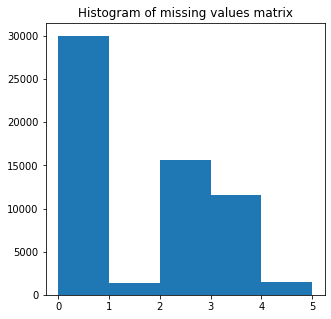

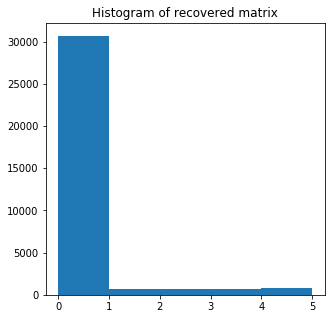

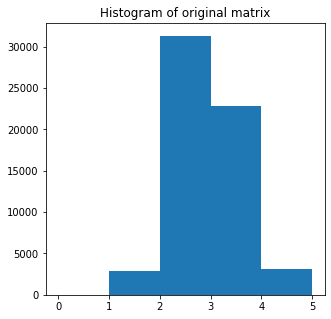

In [235]:
reconstruction_error = []
for suc in range(5, 51):
    if suc % 10 == 0: print(suc)
    select = np.random.binomial(1, suc/100, size=ratings_original.shape)
    select = 1 - select
    #print(select)
    ratings = ratings_original.to_numpy()*select
    #print(ratings)
    # adapted from example code 

    # %Initialization
    mask = np.where(select == 1, True, False)
    M = np.zeros(shape=ratings.shape)
    delta = ratings.shape[0]*ratings.shape[1] / m
    tau = 250

    for i in range(500):
        u, s, vh = np.linalg.svd(M, full_matrices=False)
        #print(s)
        #print(u.shape, s.shape, vh.shape)
        s_t = np.maximum(s-tau, 0)
        #print((u[:, :200]*s_t).shape)
        Z = (u[:, :200]*s_t)@vh#[:200, :200]
        #print(Z)
        P = ratings-Z
        #print(P)
        P = np.where(select == 1, P, 0)
        #print(P)
        M0 = M.copy()
        M = M0 + delta*P
        #print(M)
    
    #print(s)
    reconstruction_error.append(np.linalg.norm(M - ratings, ord='fro') / np.linalg.norm(ratings, ord='fro'))
    
    
    if suc == 50:
        
        plt.figure(figsize=(5, 5))
        plt.hist(ratings.ravel(), bins=[0,1,2,3,4,5])
        plt.title('Histogram of missing values matrix')
        plt.show
        
        plt.figure(figsize=(5, 5))
        plt.hist(M.ravel(), bins=[0,1,2,3,4,5])
        plt.title('Histogram of recovered matrix')
        plt.show
        
        plt.figure(figsize=(5, 5))
        plt.hist(ratings_original.to_numpy().ravel(), bins=[0,1,2,3,4,5])
        plt.title('Histogram of original matrix')
        plt.show
        

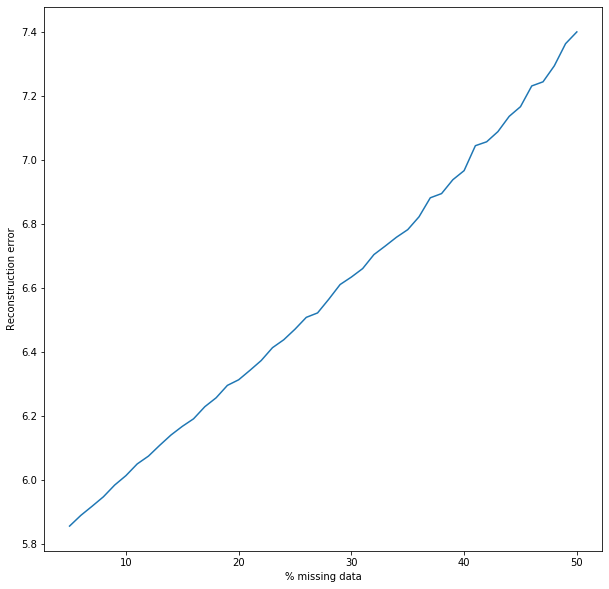

In [236]:
plt.figure(figsize=(10, 10))
plt.plot(list(range(5, 51)), reconstruction_error)
plt.ylabel("Reconstruction error")
plt.xlabel("% missing data")
plt.savefig("error_vs_missing.png")

# Missing Not at Random

In [237]:
hist = np.histogram(ratings_original)[0]
hist = hist[hist != 0]
print(hist) # the amount of 5 star ratings is negligible 

select = np.zeros(shape=ratings_original.shape)

for i in range(ratings_original.shape[0]):
    for j in range(ratings_original.shape[1]):
        
        #print(i,j)
        if ratings_original.to_numpy()[i,j] < 3:
            select[i,j] = 1 - np.random.binomial(1, 3*(suc/4) / 100)
            
        if ratings_original.to_numpy()[i,j] >= 3 and ratings_original.to_numpy()[i,j] < 5:
            select[i,j] = 1 - np.random.binomial(1, (suc/4) / 100)
            
        
print(np.count_nonzero(select))

[ 2851 31298 22792  3011    48]
44046


10
20
30
40
50


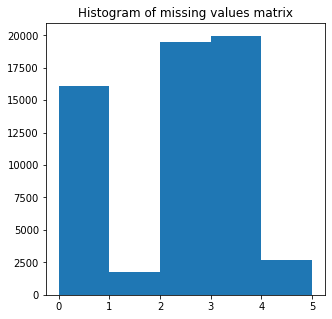

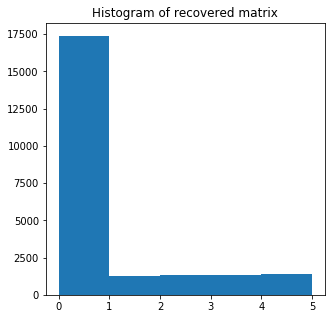

In [238]:
reconstruction_error = []
for suc in range(5, 51):
    if suc % 10 == 0: print(suc)
    select = np.zeros(shape=ratings_original.shape)

    for i in range(ratings_original.shape[0]):
        for j in range(ratings_original.shape[1]):

            #print(i,j)
            if ratings_original.to_numpy()[i,j] < 3:
                select[i,j] = 1 - np.random.binomial(1, 3*(suc/4) / 100)

            if ratings_original.to_numpy()[i,j] >= 3 and ratings_original.to_numpy()[i,j] < 5:
                select[i,j] = 1 - np.random.binomial(1, (suc/4) / 100)
            
    ratings = ratings_original.to_numpy()*select
    #print(ratings)
    # adapted from example code 

    # %Initialization
    mask = np.where(select == 1, True, False)
    M = np.zeros(shape=ratings.shape)
    delta = ratings.shape[0]*ratings.shape[1] / m
    tau = 250

    for i in range(500):
        u, s, vh = np.linalg.svd(M, full_matrices=False)
        #print(s)
        #print(u.shape, s.shape, vh.shape)
        s_t = np.maximum(s-tau, 0)
        #print((u[:, :200]*s_t).shape)
        Z = (u[:, :200]*s_t)@vh#[:200, :200]
        #print(Z)
        P = ratings-Z
        #print(P)
        P = np.where(select == 1, P, 0)
        #print(P)
        M0 = M.copy()
        M = M0 + delta*P
        #print(M)
    
    #print(s)
    reconstruction_error.append(np.linalg.norm(M - ratings, ord='fro') / np.linalg.norm(ratings, ord='fro'))
    
    
    if suc == 50:
        
        plt.figure(figsize=(5, 5))
        plt.hist(ratings.ravel(), bins=[0,1,2,3,4,5])
        plt.title('Histogram of missing values matrix')
        plt.show
        
        plt.figure(figsize=(5, 5))
        plt.hist(M.ravel(), bins=[0,1,2,3,4,5])
        plt.title('Histogram of recovered matrix')
        plt.show


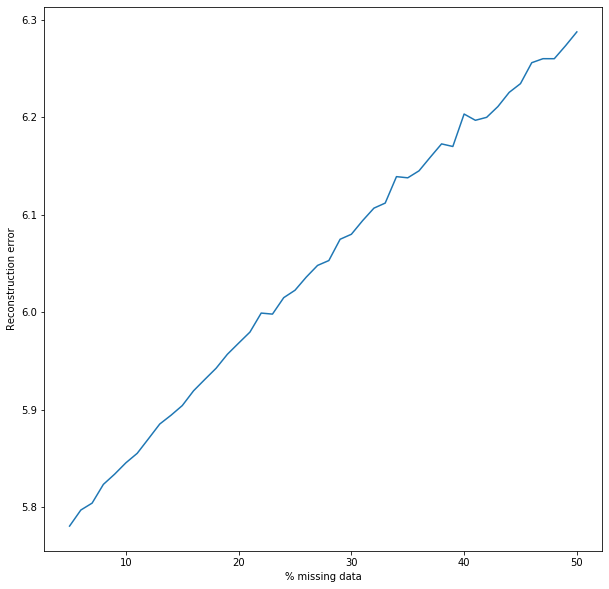

In [239]:
plt.figure(figsize=(10, 10))
plt.plot(list(range(5, 51)), reconstruction_error)
plt.ylabel("Reconstruction error")
plt.xlabel("% missing data")
plt.savefig("error_vs_missing2.png")